In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!cp "/content/drive/MyDrive/KLEEMANN/2_year_samples.xlsx" "/content"

In [3]:
# Define xlsx filename
filename = "/content/2_year_samples.xlsx"
# Read the .xlsx
df = pd.read_excel(filename)
# Drop columns that we don't need
df_cleaned = df.drop(df.columns[[0, 7]],axis = 1)
# Set Dataframe's dtype to float32
df_cleaned = df_cleaned.astype(np.float32)
print(df_cleaned.shape)
df_cleaned.head()

(109970, 6)


,SPEED UP,NOISE UP,PRESSURE UP,SPEED DOWN,NOISE DOWN,PRESSURE DOWN
0,0.0,51.049999,15.66,0.00,56.360001,17.17
1,0.0,51.049999,15.66,0.00,56.099998,16.68
2,0.0,51.189999,15.66,0.00,55.939999,16.68
3,0.0,52.139999,15.66,0.00,55.939999,15.29
4,0.0,52.139999,15.66,0.07,55.869999,15.29


In [4]:
features = list(df_cleaned.columns)
features

['SPEED UP',
 'NOISE UP',
 'PRESSURE UP',
 'SPEED DOWN',
 'NOISE DOWN',
 'PRESSURE DOWN']

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

for i in range(int(len(features) / 2)):
    feature_a, feature_b = features[i], features[i+3]
    
    # plot time signal:
    axs[i, 0].set_title(f"{feature_a}")
    axs[i, 0].plot(df_cleaned[feature_a], color='b')

    # plot different spectrum types:
    axs[i, 1].set_title(f"{feature_b}")
    axs[i, 1].plot(df_cleaned[feature_b],  color='b')

fig.tight_layout()
plt.savefig("features_full_range.png")
plt.show()

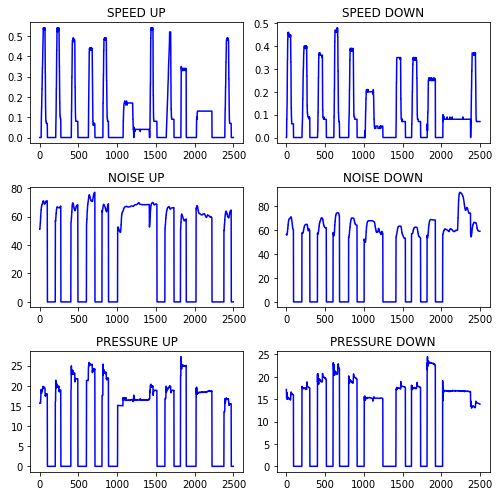

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

for i in range(int(len(features) / 2)):
    feature_a, feature_b = features[i], features[i+3]
    
    # plot time signal:
    axs[i, 0].set_title(f"{feature_a}")
    axs[i, 0].plot(df_cleaned[feature_a][:2500], color='b')

    # plot different spectrum types:
    axs[i, 1].set_title(f"{feature_b}")
    axs[i, 1].plot(df_cleaned[feature_b][:2500],  color='b')

fig.tight_layout()
plt.savefig("features_range_2500.png")
plt.show()

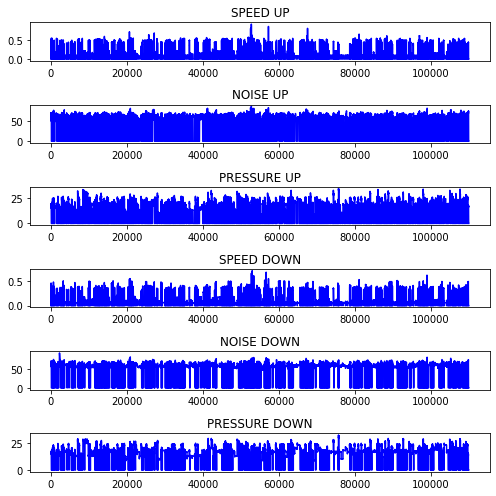

In [13]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(7, 7))

for i in range(int(len(features))):
    feature = features[i]

    # plot time signal:
    axs[i].set_title(f"{feature}")
    axs[i].plot(df_cleaned[feature], color='b')

fig.tight_layout()
plt.savefig("features_full_range_vertical.png")
plt.show()

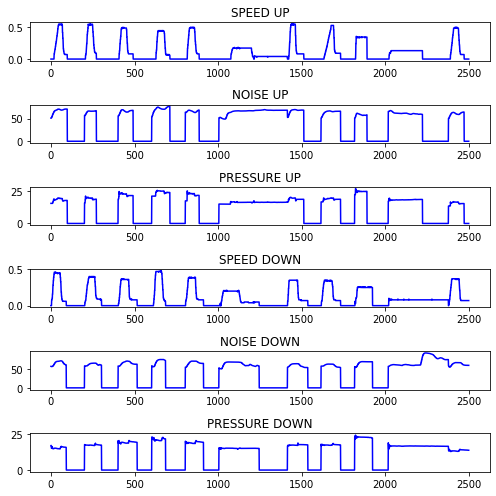

In [8]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(7, 7))

for i in range(int(len(features))):
    feature = features[i]

    # plot time signal:
    axs[i].set_title(f"{feature}")
    axs[i].plot(df_cleaned[feature][:2500], color='b')

fig.tight_layout()
plt.savefig("features_range_2500_vertical.png")
plt.show()

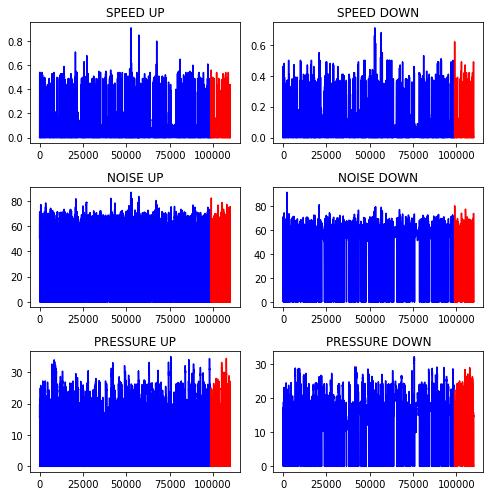

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

for i in range(int(len(features) / 2)):
    feature_a, feature_b = features[i], features[i+3]

    seq_length = 15

    data_a, data_b = df_cleaned[feature_a], df_cleaned[feature_b]
    
    train_ts_a = data_a[0:int(9 * data_a.shape[0] / 10)]            
    test_ts_a = data_a[(int(9 * data_a.shape[0] / 10) - seq_length):]

    train_ts_b = data_b[0:int(9 * data_a.shape[0] / 10)]            
    test_ts_b = data_b[(int(9 * data_a.shape[0] / 10) - seq_length):]

    # plot time signal:
    axs[i, 0].set_title(f"{feature_a}")
    axs[i, 0].plot(train_ts_a, color='b')
    axs[i, 0].plot(test_ts_a, color='r')

    # plot different spectrum types:
    axs[i, 1].set_title(f"{feature_b}")
    axs[i, 1].plot(train_ts_b,  color='b')
    axs[i, 1].plot(test_ts_b,  color='r')

fig.tight_layout()
plt.savefig("features_train_test_split.png")
plt.show()

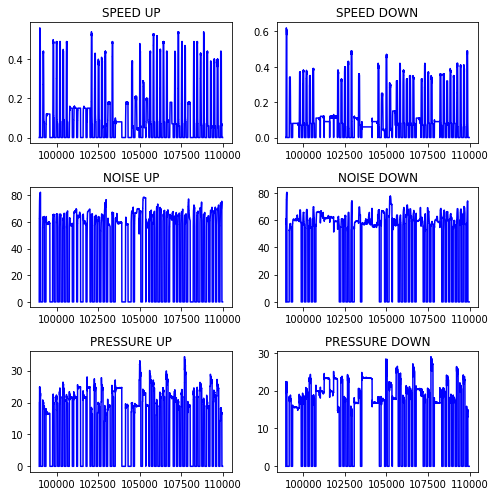

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

for i in range(int(len(features) / 2)):
    feature_a, feature_b = features[i], features[i+3]

    seq_length = 15

    data_a, data_b = df_cleaned[feature_a], df_cleaned[feature_b]
    
    train_ts_a = data_a[0:int(9 * data_a.shape[0] / 10)]            
    test_ts_a = data_a[(int(9 * data_a.shape[0] / 10) - seq_length):]

    train_ts_b = data_b[0:int(9 * data_a.shape[0] / 10)]            
    test_ts_b = data_b[(int(9 * data_a.shape[0] / 10) - seq_length):]

    # plot time signal:
    axs[i, 0].set_title(f"{feature_a}")
    axs[i, 0].plot(test_ts_a, color='b')

    # plot different spectrum types:
    axs[i, 1].set_title(f"{feature_b}")
    axs[i, 1].plot(test_ts_b,  color='b')

fig.tight_layout()
plt.savefig("features_test_split.png")
plt.show()

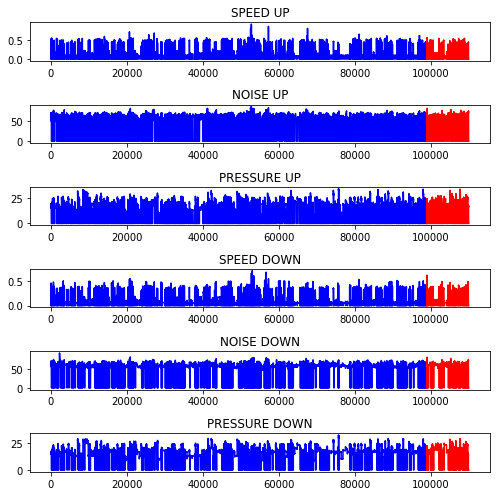

In [11]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(7, 7))

for i in range(int(len(features))):
    feature_a = features[i]

    seq_length = 15

    data_a = df_cleaned[feature_a]
    
    train_ts_a = data_a[0:int(9 * data_a.shape[0] / 10)]            
    test_ts_a = data_a[(int(9 * data_a.shape[0] / 10) - seq_length):]

    # plot time signal:
    axs[i].set_title(f"{feature_a}")
    axs[i].plot(train_ts_a, color='b')
    axs[i].plot(test_ts_a, color='r')

fig.tight_layout()
plt.savefig("features_train_test_split_vertical.png")
plt.show()

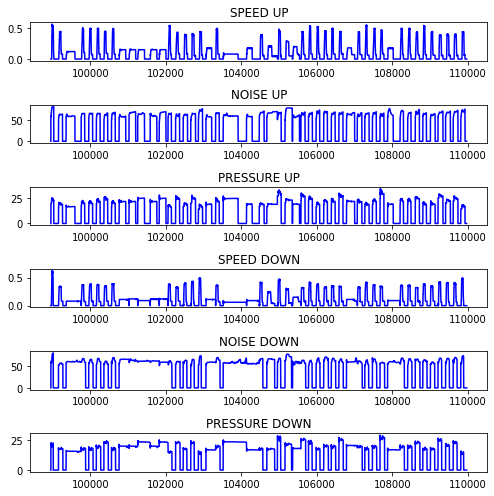

In [12]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(7, 7))

for i in range(int(len(features))):
    feature_a = features[i]

    seq_length = 15

    data_a = df_cleaned[feature_a]
    
    train_ts_a = data_a[0:int(9 * data_a.shape[0] / 10)]            
    test_ts_a = data_a[(int(9 * data_a.shape[0] / 10) - seq_length):]

    # plot time signal:
    axs[i].set_title(f"{feature_a}")
    axs[i].plot(test_ts_a, color='b')

fig.tight_layout()
plt.savefig("features_test_split_vertical.png")
plt.show()